## Modelos de clasificación

En este notebook vamos a entrenar cinco modelos diferentes de clasificación con el objetivo de predecir, en un periodo a 10 años, si un municipio será un área poblada o despoblada.  
Además, calcularemos las variables más significativas del modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV

pd.options.display.max_columns = None
pd.options.display.max_rows = None

Carga de los datos:

In [2]:
Despoblacion = pd.read_csv('/home/dsc/Python/Despoblacion/5.Analisis_Preliminar_Variables/Despoblacion.csv', 
                           dtype = {'Codigo CCAA' : str, 'Codigo Provincia' : str, 'Codigo Municipio' : str})

Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
0,Castilla-La Mancha,08,Albacete,02,Abengibre,02001,902.0,457.0,445.0,30.77,29.31,634.0,5.0,3.0,19.0,266.0,330.0,193.0,137.0,729.0,316.0,413.0,0.0,0.0,0.0,0.0,1.0,2.0,3.0,0.0,0.0,40.0,28.0,68.0,16.0,28.0,44.0,455.0,462.0,462.0,75.0,545.0,240.0,295.0,485.0,2.0,2.0,60.0,370.0,390.0,250.0,30.0,115.0,30.0,145.0,50.0,35.0,25.0,50.0,795.0,50.0,185.0,205.0,245.0,100.0,75.0,42.0,183.0,461.0,11.0,4.0,100.0,200.0,814.0,500.0,190.0,200.08,3046.46,199.0,8.0,0
1,Castilla-La Mancha,08,Albacete,02,Alatoz,02002,604.0,340.0,264.0,63.86,9.46,858.0,1.0,0.0,5.0,94.0,160.0,98.0,62.0,824.0,376.0,448.0,0.0,0.0,0.0,0.0,1.0,0.0,7.0,0.0,0.0,32.0,27.0,60.0,16.0,20.0,36.0,495.0,528.0,528.0,65.0,320.0,205.0,205.0,305.0,2.0,15.0,55.0,295.0,190.0,210.0,15.0,55.0,25.0,65.0,50.0,35.0,30.0,70.0,505.0,70.0,200.0,95.0,145.0,55.0,25.0,47.0,168.0,558.0,12.0,4.0,60.0,190.0,468.0,350.0,30.0,221.63,3510.26,182.0,19.0,1
2,Castilla-La Mancha,08,Albacete,02,Albacete,02003,171390.0,84288.0,87102.0,1126.99,152.08,681.0,1957.0,658.0,1156.0,69496.0,57712.0,30515.0,27197.0,206017.0,97756.0,108261.0,0.0,0.0,0.0,0.0,21.0,128.0,1099.0,9.0,1.0,7104.0,6570.0,13674.0,8684.0,9293.0,17977.0,15346.0,89834.0,83229.0,29940.0,117445.0,23645.0,79255.0,76720.0,2205.0,4325.0,8525.0,32750.0,108345.0,26480.0,5255.0,6020.0,9455.0,21910.0,8840.0,6490.0,20340.0,13445.0,157585.0,13445.0,33800.0,39760.0,58910.0,16345.0,8765.0,26.0,40004.0,82879.0,7400.0,141.0,37410.0,25570.0,118487.0,101310.0,78378.0,67413.35,112129.80,1406.0,159.0,0
3,Castilla-La Mancha,08,Albacete,02,Albatana,02004,794.0,403.0,391.0,30.50,26.03,582.0,5.0,3.0,5.0,143.0,266.0,204.0,62.0,898.0,336.0,562.0,0.0,0.0,0.0,0.0,1.0,2.0,2.0,0.0,0.0,22.0,19.0,41.0,38.0,40.0,78.0,536.0,570.0,570.0,90.0,470.0,230.0,285.0,415.0,2.0,2.0,60.0,365.0,310.0,235.0,25.0,45.0,2.0,120.0,65.0,35.0,2.0,60.0,700.0,60.0,205.0,140.0,220.0,105.0,55.0,52.0,80.0,454.0,8.0,3.0,35.0,260.0,707.0,489.0,195.0,73.01,2177.74,179.0,23.0,0
4,Castilla-La Mancha,08,Albacete,02,Alborea,02005,848.0,439.0,409.0,71.87,11.80,706.0,7.0,1.0,15.0,161.0,439.0,259.0,180.0,1069.0,537.0,532.0,0.0,0.0,0.0,0.0,1.0,2.0,5.0,0.0,0.0,69.0,69.0,138.0,50.0,66.0,116.0,587.0,636.0,635.0,95.0,510.0,220.0,295.0,430.0,2.0,10.0,85.0,350.0,327.0,215.0,15.0,70.0,35.0,130.0,50.0,35.0,135.0,100.0,705.0,100.0,185.0,140.0,370.0,30.0,2.0,46.0,168.0,680.0,19.0,3.0,115.0,225.0,781.0,454.0,0.0,175.37,3525.71,187.0,6.0,1


Escalamos los datos numéricos con MinMaxScaler:

In [3]:
Columnas = Despoblacion.columns[6 : -2]
scaler = MinMaxScaler()
Despoblacion[Columnas] = scaler.fit_transform(Despoblacion[Columnas])

Despoblacion.head()

,Nombre CCAA,Codigo CCAA,Nombre Provincia,Codigo Provincia,Nombre Municipio,Codigo Municipio,Poblacion Total,Poblacion Hombre,Poblacion Mujer,Superficie Km2,Densidad Poblacion,Altitud Municipios,Nacimientos,Matrimonios,Defunciones,Total Regimen SS,Total Contratos,Contratos Hombres,Contratos Mujeres,Total Paro Registrado,Parados Hombres,Parados Mujeres,Nº Establecimientos Agricultura,Nº Establecimientos Industria,Nº Establecimientos Construccion,Nº Establecimientos Servicios,Nº Centros Sanitarios,Nº Centros Educativos,Número de transacciones anuales 2011,Nº Residencias Mayores,Nº Instituciones Religiosas y Militares,Nº Hombres Extranjeros,Nº Mujeres Extranjeras,Nº Total Extranjeros,Nº Hombres Otra CCAA,Nº Mujeres Otra CCAA,Nº Total Otra CCAA,Nº edificios,Nº Inmuebles,Nº viviendas,Edad < 16,16 =< Edad =<64,Edad >= 65,Soltero/a,Casado/a,Separado/a,Divorciado/a,Viudo/a,Sin Estudios,Con Estudios,Nº de Jubilados,Empresario que emplea personal,Empresario que no emplea personal,1 hijo/a,2 hijos/as,3 hijos/as,4 o más hijos/as,Nº de Alquileres,Hogares Unipersonales,Hogares Familiares,1 persona,2 personas,3 personas,4 personas,5 personas,6 o más personas,Edad Media Edificios,Uso Industrial,Uso Residelcial,Uso Terciario,Otros Usos,Nº Hogares si Internet,Nº Hogares no Internet,Nº Vehiculos,Nº Conductores,Deuda (Miles de €),Total impuestos (Miles de €),Superficie (Ha) Agricolas,Nº Explotaciones Agrícolas,Nº Explotaciones Ganaderas,Umbral
0,Castilla-La Mancha,08,Albacete,02,Abengibre,02001,0.000275,0.000297,0.000255,0.017564,0.001349,0.373672,0.000152,0.000232,0.000716,0.000152,0.000299,0.000346,0.000251,0.000276,0.000241,0.000312,0.0,0.0,0.0,0.0,0.005348,0.001172,0.000147,0.000000,0.000000,0.000137,0.000083,0.000108,0.000042,0.000055,0.000049,0.003409,0.000282,0.000297,0.000164,0.000257,0.000387,0.000198,0.000367,0.00000,0.000000,0.000273,0.000708,0.000175,0.000392,0.000411,0.001089,0.000119,0.000380,0.000307,0.000336,0.000038,0.000126,0.000283,0.000126,0.000226,0.000272,0.000308,0.000346,0.000502,0.524590,0.000364,0.000318,0.000078,0.001732,0.000118,0.000405,0.000413,0.000306,0.000030,0.000106,0.023236,0.032337,8.0,0
1,Castilla-La Mancha,08,Albacete,02,Alatoz,02002,0.000183,0.000220,0.000151,0.036470,0.000426,0.505903,0.000030,0.000000,0.000188,0.000053,0.000145,0.000176,0.000114,0.000312,0.000286,0.000338,0.0,0.0,0.0,0.0,0.005348,0.000000,0.000343,0.000000,0.000000,0.000110,0.000080,0.000095,0.000042,0.000039,0.000040,0.003712,0.000323,0.000340,0.000142,0.000151,0.000330,0.000138,0.000230,0.00000,0.000113,0.000250,0.000563,0.000084,0.000329,0.000206,0.000521,0.000098,0.000170,0.000307,0.000336,0.000045,0.000179,0.000179,0.000179,0.000244,0.000126,0.000182,0.000190,0.000167,0.606557,0.000334,0.000385,0.000085,0.001732,0.000070,0.000385,0.000237,0.000214,0.000005,0.000118,0.026773,0.029574,19.0,1
2,Castilla-La Mancha,08,Albacete,02,Albacete,02003,0.052491,0.055094,0.050196,0.643904,0.007058,0.401417,0.059415,0.050846,0.043550,0.040016,0.052311,0.054701,0.049866,0.078127,0.074482,0.081738,0.0,0.0,0.0,0.0,0.112299,0.075029,0.053807,0.040541,0.009804,0.024391,0.019386,0.021699,0.022567,0.018151,0.020046,0.116459,0.055602,0.054360,0.065300,0.055583,0.038434,0.053317,0.058334,0.04369,0.037633,0.038811,0.062975,0.049066,0.041514,0.072026,0.056994,0.040314,0.057352,0.056461,0.062386,0.030584,0.035392,0.056144,0.035392,0.041228,0.052779,0.074109,0.056485,0.058701,0.262295,0.079619,0.057753,0.052721,0.061065,0.044953,0.052354,0.060121,0.061938,0.012347,0.035781,0.855221,0.228469,159.0,0
3,Castilla-La Mancha,08,Albacete,02,Albatana,02004,0.000242,0.000261,0.000224,0.017409,0.001197,0.342975,0.000152,0.000232,0.000188,0.000081,0.000241,0.000366,0.000114,0.000341,0.000256,0.000424,0.0,0.0,0.0,0.0,0.005348,0.001172,0.000098,0.000000,0.000000,0.000076,0.000056,0.000065,0.000099,0.000078,0.000087,0.004024,0.000349,0.000368,0.000196,0.000221,0.000371,0.000192,0.000314,0.00000,0.000000,0.000273,0.000698,0.000139,0.000368,0.000343,0.000426,0.000000,0.000314,

Dividimos los datos en conjunto de entrenamiento y test:

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
                                        Despoblacion.drop(['Nombre CCAA', 'Codigo CCAA', 'Nombre Provincia', 'Codigo Provincia', 
                                                        'Nombre Municipio', 'Codigo Municipio', 'Superficie Km2',
                                                        'Densidad Poblacion', 'Umbral'], axis = 1),
                                        Despoblacion['Umbral'],
                                        train_size   = 0.8,
                                        random_state = 42, 
                                        stratify = Despoblacion['Umbral']
                                    )

In [5]:
print('Tamaño de X_train:', X_train.shape)
print('Tamaño de X_test:', X_test.shape)
print('Tamaño de y_train:', y_train.shape)
print('Tamaño de y_test:', y_test.shape)

Tamaño de X_train: (6041, 72)
Tamaño de X_test: (1511, 72)
Tamaño de y_train: (6041,)
Tamaño de y_test: (1511,)


Definimos una función de ayuda para evaluar cada uno de los 5 modelos que vamos a entrenar:

In [6]:
def modelo_evaluacion(modelo, x_test, y_test):

    y_pred = modelo.predict(x_test)

    # Calculamos accuracy, precision, recall y f1-score
    acc = metrics.accuracy_score(y_test, y_pred)
    prec = metrics.precision_score(y_test, y_pred)
    rec = metrics.recall_score(y_test, y_pred)
    f1 = metrics.f1_score(y_test, y_pred)

    # Cálculo del area bajo la curva (AUC)
    y_pred_proba = modelo.predict_proba(x_test)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y_test, y_pred_proba)
    auc = metrics.roc_auc_score(y_test, y_pred_proba)

    # Display matriz de confusión
    cm = metrics.confusion_matrix(y_test, y_pred)
    Opciones = ['True Neg','False Pos','False Neg','True Pos']
    Datos = ['{0:0.0f}'.format(value) for value in cm.flatten()]
    Etiquetas = [f'{v1}\n{v2}' for v1, v2 in
          zip(Opciones, Datos)]
    Etiquetas = np.asarray(Etiquetas).reshape(2,2)
    sns.heatmap(cm, annot = Etiquetas, fmt = '', cmap = 'BuGn')

    return {'acc': acc, 'prec': prec, 'rec': rec, 'f1': f1,
            'fpr': fpr, 'tpr': tpr, 'auc': auc}

Entrenamos un modelo de referencia para cada algoritmo utilizando los parámetros predeterminados establecidos por Sklearn.

1. Regresión logística

Accuracy: 0.8411647915287889
Precision: 0.8369987063389392
Recall: 0.8501971090670171
F1 Score: 0.8435462842242504
Area Under Curve: 0.9284204993429699
Matriz de confusión:


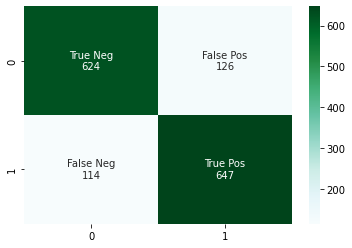

In [7]:
rl = LogisticRegression(random_state = 0)
rl.fit(X_train, y_train)

rl_eval = modelo_evaluacion(rl, X_test, y_test)

print('Accuracy:', rl_eval['acc'])
print('Precision:', rl_eval['prec'])
print('Recall:', rl_eval['rec'])
print('F1 Score:', rl_eval['f1'])
print('Area Under Curve:', rl_eval['auc'])
print('Matriz de confusión:')

2. Support Vector Machines (SVM)

Accuracy: 0.5784248841826605
Precision: 0.5517529215358932
Recall: 0.8685939553219448
F1 Score: 0.6748340990301174
Area Under Curve: 0.632419623302672
Confusion Matrix:


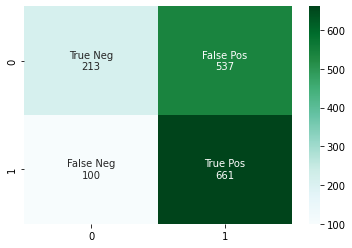

In [8]:
svc = SVC(random_state = 0, probability = True) #predict_proba is not available when probability=False
svc.fit(X_train, y_train)

svc_eval = modelo_evaluacion(svc, X_test, y_test)

print('Accuracy:', svc_eval['acc'])
print('Precision:', svc_eval['prec'])
print('Recall:', svc_eval['rec'])
print('F1 Score:', svc_eval['f1'])
print('Area Under Curve:', svc_eval['auc'])
print('Confusion Matrix:')

3. Random Forest

Accuracy: 0.9291859695565851
Precision: 0.9325396825396826
Recall: 0.926412614980289
F1 Score: 0.9294660514172708
Area Under Curve: 0.9823144984669294
Confusion Matrix:


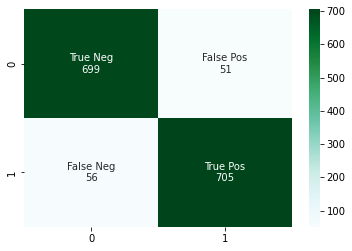

In [9]:
rf = RandomForestClassifier(random_state = 0)
rf.fit(X_train, y_train)

rf_eval = modelo_evaluacion(rf, X_test, y_test)

print('Accuracy:', rf_eval['acc'])
print('Precision:', rf_eval['prec'])
print('Recall:', rf_eval['rec'])
print('F1 Score:', rf_eval['f1'])
print('Area Under Curve:', rf_eval['auc'])
print('Confusion Matrix:')

4. Naive Bayes

Accuracy: 0.587028457974851
Precision: 0.5496017378711079
Recall: 0.9973718791064389
F1 Score: 0.7086834733893558
Area Under Curve: 0.6064213753832677
Confusion Matrix:


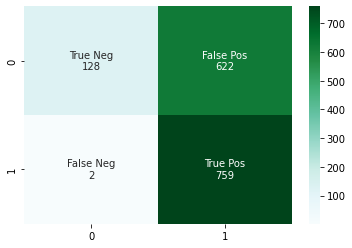

In [10]:
nb = GaussianNB()
nb.fit(X_train, y_train)

nb_eval = modelo_evaluacion(nb, X_test, y_test)

print('Accuracy:', nb_eval['acc'])
print('Precision:', nb_eval['prec'])
print('Recall:', nb_eval['rec'])
print('F1 Score:', nb_eval['f1'])
print('Area Under Curve:', nb_eval['auc'])
print('Confusion Matrix:')

5. K-vecinos más cercanos (KNN)

Accuracy: 0.8074123097286565
Precision: 0.8075916230366492
Recall: 0.8107752956636005
F1 Score: 0.8091803278688525
Area Under Curve: 0.8792089356110381
Confusion Matrix:


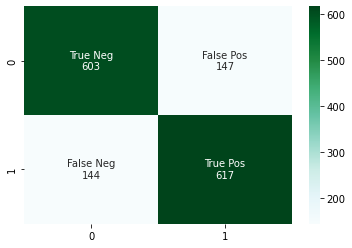

In [11]:
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

knn_eval = modelo_evaluacion(knn, X_test, y_test)

print('Accuracy:', knn_eval['acc'])
print('Precision:', knn_eval['prec'])
print('Recall:', knn_eval['rec'])
print('F1 Score:', knn_eval['f1'])
print('Area Under Curve:', knn_eval['auc'])
print('Confusion Matrix:')

Comparamos que tan bien funciona cada modelo.  

Representamos dos gráficos:  
- Gráfico de barras agrupadas para mostrar el valor de accuracy, precisión, recall y f1 de todos nuestros modelos  
- Gráfico de líneas para mostrar el AUC de todos nuestros modelos  

A mayores creamos un DataFrame con las métricas de todos los modelos

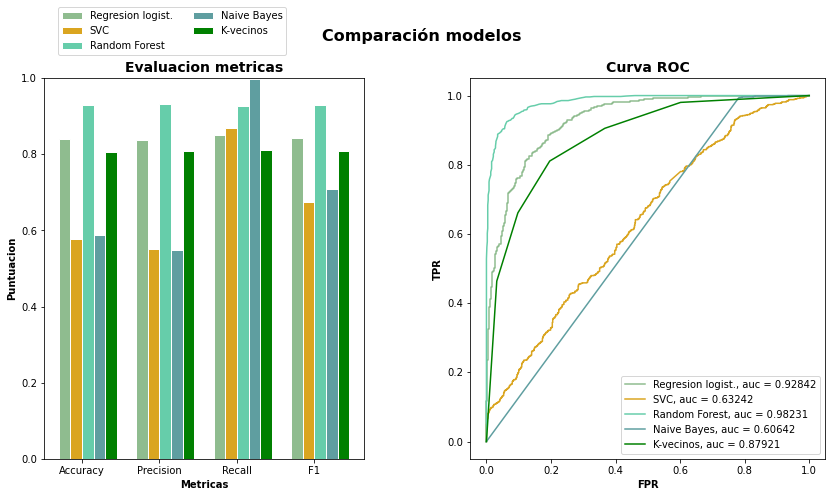

,Accuracy,Precision,Recall,F1
rl,0.841165,0.836999,0.850197,0.843546
svc,0.578425,0.551753,0.868594,0.674834
rf,0.929186,0.932540,0.926413,0.929466
nb,0.587028,0.549602,0.997372,0.708683
knn,0.807412,0.807592,0.810775,0.809180


In [12]:
# Inicializamos los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparación modelos', fontsize = 16, fontweight = 'bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Valores del primer gráfico
rl_score = [rl_eval['acc'], rl_eval['prec'], rl_eval['rec'], rl_eval['f1']]
svc_score = [svc_eval['acc'], svc_eval['prec'], svc_eval['rec'], svc_eval['f1']]
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
nb_score = [nb_eval['acc'], nb_eval['prec'], nb_eval['rec'], nb_eval['f1']]
knn_score = [knn_eval['acc'], knn_eval['prec'], knn_eval['rec'], knn_eval['f1']]

# Posición de las barras en el eje X
barWidth = 0.15
r1 = np.arange(len(rl_score))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
r4 = [x + barWidth for x in r3]
r5 = [x + barWidth for x in r4]


# Primer gráfico
ax1.bar(r1, rl_score, width = barWidth, edgecolor='white', label = 'Regresion logist.', color = 'darkseagreen')
ax1.bar(r2, svc_score, width = barWidth, edgecolor='white', label = 'SVC', color = 'goldenrod')
ax1.bar(r3, rf_score, width = barWidth, edgecolor='white', label = 'Random Forest', color = 'mediumaquamarine')
ax1.bar(r4, nb_score, width = barWidth, edgecolor='white', label = 'Naive Bayes', color = 'cadetblue')
ax1.bar(r5, knn_score, width = barWidth, edgecolor='white', label = 'K-vecinos', color = 'green')

# Ejes x e y
ax1.set_xlabel('Metricas', fontweight = 'bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(rl_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Puntuacion', fontweight = 'bold')
ax1.set_ylim(0, 1)

# Leyenda y título
ax1.set_title('Evaluacion metricas', fontsize = 14, fontweight = 'bold')
pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax1.legend(loc = 9, bbox_to_anchor = (0.4, 1.2), ncol = 2)

# Segundo gráfico con las curvas AUC
ax2.plot(rl_eval['fpr'], rl_eval['tpr'], label = 'Regresion logist., auc = {:0.5f}'.format(rl_eval['auc']), color = 'darkseagreen')
ax2.plot(svc_eval['fpr'], svc_eval['tpr'], label = 'SVC, auc = {:0.5f}'.format(svc_eval['auc']), color = 'goldenrod')
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label = 'Random Forest, auc = {:0.5f}'.format(rf_eval['auc']), color = 'mediumaquamarine')
ax2.plot(nb_eval['fpr'], nb_eval['tpr'], label = 'Naive Bayes, auc = {:0.5f}'.format(nb_eval['auc']), color = 'cadetblue')
ax2.plot(knn_eval['fpr'], knn_eval['tpr'], label = 'K-vecinos, auc = {:0.5f}'.format(knn_eval['auc']), color = 'green')

# Ejes x e y
ax2.set_xlabel('FPR', fontweight = 'bold')
ax2.set_ylabel('TPR', fontweight = 'bold')

# Leyenda y título
ax2.set_title('Curva ROC', fontsize = 14, fontweight = 'bold')
ax2.legend(loc = 4)

plt.show()

# DataFrame con los resultados de las métricas
Resultados = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall ', 
            'F1'], data = {'rl' : rl_score, 'svc' : svc_score, 'rf' : rf_score,
                           'nb' : nb_score, 'knn' : knn_score})
Resultados.transpose( )

RF es la mejor opción.

Optimizamos el modelo de RF ajustando los hiperparámetros:

In [13]:
# Diccionario con los parámetros de grid search
param_grid = {
    'max_depth': [50, 80, 100],
    'max_features': [4, 6, 8, 9],
    'min_samples_leaf': [2, 3, 4, 5],
    'min_samples_split': [8, 10, 12],
    'n_estimators': [100, 300, 500]
}

# Modelo base
rf_grid = RandomForestClassifier(random_state = 0)

# Inicializamos grid search
grid_search = GridSearchCV(estimator = rf_grid, param_grid = param_grid,
                           cv = 5, n_jobs = -1, verbose = 2)

# Ajustamos grid search
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   1.6s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   5.5s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   5.7s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   5.2s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   9.8s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=   8.8s
[CV] END max_depth=50, max_features=4, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   1.7s

[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   5.5s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   5.1s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   6.0s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   9.1s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=   8.8s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=50, max_features=4, min_samples_leaf=5, mi

[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   5.5s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   8.7s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   8.6s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.4s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.0s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.6s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   5.8s
[CV] END max_depth=50, max_features=6, min_samples_leaf=4, 

[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   2.0s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   7.1s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   6.9s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=300; total time=   6.3s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=169.7min
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=  10.4s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.8s
[CV] END max_depth=50, max_features=8, min_samples_leaf=3, mi

[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   8.5s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   8.0s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=300; total time=   8.1s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=  12.2s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=  13.7s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   4.2s
[CV] END max_depth=50, max_features=9, min_samples_leaf=2, mi

[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   8.2s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   6.7s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=300; total time=   6.6s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=  12.8s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=500; total time=  12.5s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.0s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=50, max_features=9, min_samples_leaf=5, mi

[CV] END max_depth=80, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   3.4s
[CV] END max_depth=80, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   6.2s
[CV] END max_depth=80, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   5.7s
[CV] END max_depth=80, max_features=4, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=   5.8s
[CV] END max_depth=80, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   1.2s
[CV] END max_depth=80, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.5s
[CV] END max_depth=80, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.4s
[CV] END max_depth=80, max_features=4, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   3.5s
[CV] END max_depth=80, max_features=4, min_samples_leaf=4, m

[CV] END max_depth=80, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   7.8s
[CV] END max_depth=80, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   7.9s
[CV] END max_depth=80, max_features=6, min_samples_leaf=3, min_samples_split=8, n_estimators=500; total time=   7.7s
[CV] END max_depth=80, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=100; total time=   1.5s
[CV] END max_depth=80, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.6s
[CV] END max_depth=80, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.6s
[CV] END max_depth=80, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=300; total time=   4.7s
[CV] END max_depth=80, max_features=6, min_samples_leaf=3, min_samples_split=10, n_estimators=500; total time=   8.0s
[CV] END max_depth=80, max_features=6, min_samples_leaf=3, 

[CV] END max_depth=80, max_features=8, min_samples_leaf=2, min_samples_split=8, n_estimators=500; total time=  18.8s
[CV] END max_depth=80, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   3.0s
[CV] END max_depth=80, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=100; total time=   2.6s
[CV] END max_depth=80, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   6.6s
[CV] END max_depth=80, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   6.6s
[CV] END max_depth=80, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  11.9s
[CV] END max_depth=80, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  13.2s
[CV] END max_depth=80, max_features=8, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  16.2s
[CV] END max_depth=80, max_features=8, min_samples_leaf=2

[CV] END max_depth=80, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   7.7s
[CV] END max_depth=80, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   8.6s
[CV] END max_depth=80, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=300; total time=   7.4s
[CV] END max_depth=80, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=  11.3s
[CV] END max_depth=80, max_features=8, min_samples_leaf=5, min_samples_split=12, n_estimators=500; total time=  10.9s
[CV] END max_depth=80, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   2.6s
[CV] END max_depth=80, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   2.5s
[CV] END max_depth=80, max_features=9, min_samples_leaf=2, min_samples_split=8, n_estimators=100; total time=   2.5s
[CV] END max_depth=80, max_features=9, min_samples_leaf=2, 

[CV] END max_depth=80, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=100; total time=   2.9s
[CV] END max_depth=80, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   9.6s
[CV] END max_depth=80, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   9.2s
[CV] END max_depth=80, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=300; total time=   9.1s
[CV] END max_depth=80, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=  14.2s
[CV] END max_depth=80, max_features=9, min_samples_leaf=4, min_samples_split=12, n_estimators=500; total time=  14.8s
[CV] END max_depth=80, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   3.0s
[CV] END max_depth=80, max_features=9, min_samples_leaf=5, min_samples_split=8, n_estimators=100; total time=   3.0s
[CV] END max_depth=80, max_features=9, min_samples_leaf=5,

[CV] END max_depth=100, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   1.6s
[CV] END max_depth=100, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   2.9s
[CV] END max_depth=100, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=100; total time=   2.5s
[CV] END max_depth=100, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   5.2s
[CV] END max_depth=100, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=300; total time=   6.8s
[CV] END max_depth=100, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=   9.7s
[CV] END max_depth=100, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=  12.2s
[CV] END max_depth=100, max_features=4, min_samples_leaf=3, min_samples_split=12, n_estimators=500; total time=  10.5s
[CV] END max_depth=100, max_features=4, min_samp

[CV] END max_depth=100, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=300; total time=   8.3s
[CV] END max_depth=100, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  14.2s
[CV] END max_depth=100, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  12.6s
[CV] END max_depth=100, max_features=6, min_samples_leaf=2, min_samples_split=10, n_estimators=500; total time=  13.8s
[CV] END max_depth=100, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   7.8s
[CV] END max_depth=100, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   8.4s
[CV] END max_depth=100, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   7.4s
[CV] END max_depth=100, max_features=6, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=  12.0s
[CV] END max_depth=100, max_features=6, min_samp

[CV] END max_depth=100, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.9s
[CV] END max_depth=100, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   3.3s
[CV] END max_depth=100, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=100; total time=   2.5s
[CV] END max_depth=100, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   7.2s
[CV] END max_depth=100, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   6.8s
[CV] END max_depth=100, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=300; total time=   7.8s
[CV] END max_depth=100, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=  12.6s
[CV] END max_depth=100, max_features=6, min_samples_leaf=5, min_samples_split=10, n_estimators=500; total time=  12.2s
[CV] END max_depth=100, max_features=6, min_samp

[CV] END max_depth=100, max_features=8, min_samples_leaf=4, min_samples_split=8, n_estimators=300; total time=   9.8s
[CV] END max_depth=100, max_features=8, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=  16.9s
[CV] END max_depth=100, max_features=8, min_samples_leaf=4, min_samples_split=8, n_estimators=500; total time=  14.9s
[CV] END max_depth=100, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   3.1s
[CV] END max_depth=100, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.9s
[CV] END max_depth=100, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.8s
[CV] END max_depth=100, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=100; total time=   2.9s
[CV] END max_depth=100, max_features=8, min_samples_leaf=4, min_samples_split=10, n_estimators=300; total time=   8.8s
[CV] END max_depth=100, max_features=8, min_samples

[CV] END max_depth=100, max_features=9, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=   9.8s
[CV] END max_depth=100, max_features=9, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=  11.0s
[CV] END max_depth=100, max_features=9, min_samples_leaf=2, min_samples_split=12, n_estimators=300; total time=  11.2s
[CV] END max_depth=100, max_features=9, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=  17.2s
[CV] END max_depth=100, max_features=9, min_samples_leaf=2, min_samples_split=12, n_estimators=500; total time=  17.9s
[CV] END max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.7s
[CV] END max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.6s
[CV] END max_depth=100, max_features=9, min_samples_leaf=3, min_samples_split=8, n_estimators=100; total time=   3.5s
[CV] END max_depth=100, max_features=9, min_samples

GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0), n_jobs=-1,
             param_grid={'max_depth': [50, 80, 100],
                         'max_features': [4, 6, 8, 9],
                         'min_samples_leaf': [2, 3, 4, 5],
                         'min_samples_split': [8, 10, 12],
                         'n_estimators': [100, 300, 500]},
             verbose=2)

Parámetros óptimos:

In [14]:
best_grid = grid_search.best_estimator_
best_grid

RandomForestClassifier(max_depth=50, max_features=9, min_samples_leaf=2,
                       min_samples_split=8, n_estimators=500, random_state=0)

Evaluación del modelo optimizado:

Accuracy: 0.9351422898742554
Precision: 0.9390728476821192
Recall: 0.9316688567674113
F1 Score: 0.9353562005277045
Area Under Curve: 0.9829434954007884
Confusion Matrix:


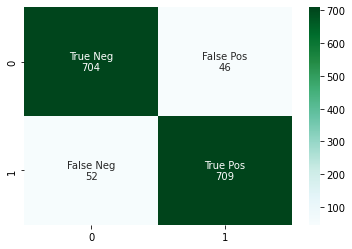

In [15]:
best_grid_eval = modelo_evaluacion(best_grid, X_test, y_test)

print('Accuracy:', best_grid_eval['acc'])
print('Precision:', best_grid_eval['prec'])
print('Recall:', best_grid_eval['rec'])
print('F1 Score:', best_grid_eval['f1'])
print('Area Under Curve:', best_grid_eval['auc'])
print('Confusion Matrix:')

Comparación de modelos RF base y la versión optimizada:

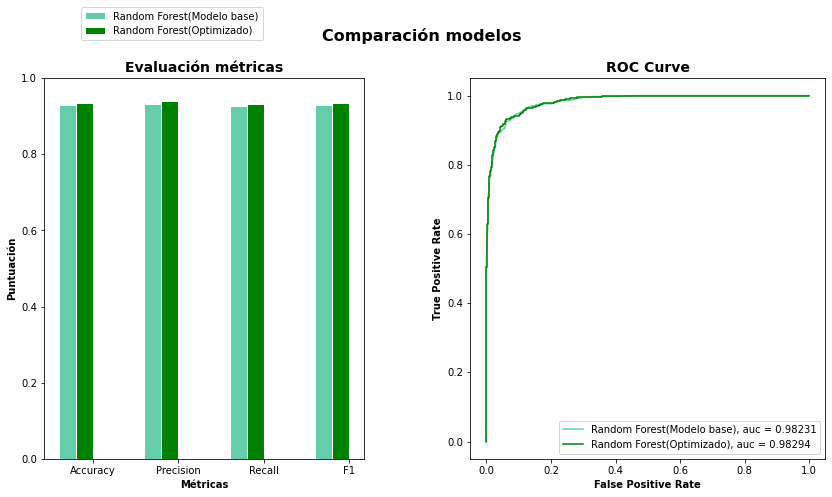

,Accuracy,Precision,Recall,F1
rf base,0.929186,0.932540,0.926413,0.929466
rf optimizado,0.935142,0.939073,0.931669,0.935356


In [16]:
# Inicializamos los dos gráficos
fig, (ax1, ax2) = plt.subplots(1, 2)
fig.suptitle('Comparación modelos', fontsize = 16, fontweight = 'bold')
fig.set_figheight(7)
fig.set_figwidth(14)
fig.set_facecolor('white')

# Valores del primer gráfico
barWidth = 0.2
rf_score = [rf_eval['acc'], rf_eval['prec'], rf_eval['rec'], rf_eval['f1']]
best_grid_score = [best_grid_eval['acc'], best_grid_eval['prec'], best_grid_eval['rec'], best_grid_eval['f1']]


# Posición de las barras en el eje X
r1 = np.arange(len(rf_score))
r2 = [x + barWidth for x in r1]

# Primer gráfico
ax1.bar(r1, rf_score, width = barWidth, edgecolor = 'white', label = 'Random Forest(Modelo base)', color = 'mediumaquamarine')
ax1.bar(r2, best_grid_score, width = barWidth, edgecolor = 'white', label = 'Random Forest(Optimizado)', color = 'green')

# Ejes x e y
ax1.set_xlabel('Métricas', fontweight = 'bold')
labels = ['Accuracy', 'Precision', 'Recall', 'F1']
ax1.set_xticks([r + (barWidth * 1.5) for r in range(len(rf_score))], )
ax1.set_xticklabels(labels)
ax1.set_ylabel('Puntuación', fontweight='bold')
ax1.set_ylim(0, 1)

# Leyenda y título
ax1.set_title('Evaluación métricas', fontsize = 14, fontweight = 'bold')
pos = ax1.get_position()
ax1.set_position([pos.x0, pos.y0, pos.width * 0.9, pos.height])
ax1.legend(loc = 9, bbox_to_anchor = (0.4, 1.2), ncol = 1)

# Segundo gráfico con las curvas AUC
ax2.plot(rf_eval['fpr'], rf_eval['tpr'], label = 'Random Forest(Modelo base), auc = {:0.5f}'.format(rf_eval['auc']), color = 'mediumaquamarine')
ax2.plot(best_grid_eval['fpr'], best_grid_eval['tpr'], label = 'Random Forest(Optimizado), auc = {:0.5f}'.format(best_grid_eval['auc']), color = 'green')

# Ejes x e y
ax2.set_xlabel('False Positive Rate', fontweight = 'bold')
ax2.set_ylabel('True Positive Rate', fontweight = 'bold')

# Leyenda y título
ax2.set_title('ROC Curve', fontsize = 14, fontweight = 'bold')
ax2.legend(loc = 4)

plt.show()

# DataFrame con los resultados de las métricas
Resultados = pd.DataFrame(index = ['Accuracy', 'Precision', 'Recall ', 
            'F1'], data = {'rf base' : rf_score, 'rf optimizado' : best_grid_score})
Resultados.transpose( )

Identificamos la importancia de las característica:

In [17]:
Despoblacion.drop(['Nombre CCAA', 'Codigo CCAA', 'Nombre Provincia', 'Codigo Provincia', 
                    'Nombre Municipio', 'Codigo Municipio', 'Densidad Poblacion', 'Umbral', 'Superficie Km2'], axis = 1, inplace = True)

In [18]:
# verificar características importantes
feature_importances_df = pd.DataFrame(
    {"Características": list(Despoblacion.columns), "Importancia": best_grid.feature_importances_}
).sort_values("Importancia", ascending=False)

feature_importances_df

,Características,Importancia
69,Superficie (Ha) Agricolas,0.094004
63,Nº Hogares si Internet,0.085722
32,Edad < 16,0.083681
4,Nacimientos,0.067514
41,Con Estudios,0.051855
33,16 =< Edad =<64,0.047856
55,4 personas,0.039279
11,Total Paro Registrado,0.031784
66,Nº Conductores,0.031162
45,1 hijo/a,0.025752


Visualizamos las 10 caracterísicas más importantes:

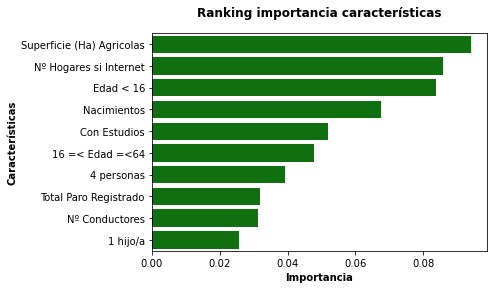

In [19]:
ax = sns.barplot(data=feature_importances_df.head(10), x = 'Importancia', y = 'Características', color = 'Green')

ax.set_xlabel('Importancia', fontweight = 'bold')
ax.set_ylabel('Características', fontweight = 'bold')
ax.set_title('Ranking importancia características', weight = "bold", fontsize = '12', y = 1.05)

plt.show()